In [1]:
import warnings
warnings.filterwarnings('ignore')

# Model Capacity

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [5]:
# y=electricity, x=surface_area
Elec.head() 

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


# 산점도(surface_area vs. electricity)

# 1차 모델 시각화

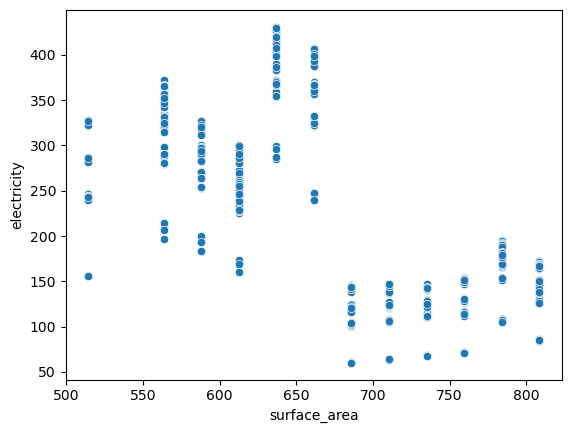

In [7]:
sns.scatterplot(x = Elec['surface_area'], y = Elec['electricity'])
plt.show()

# 2차 모델 시각화

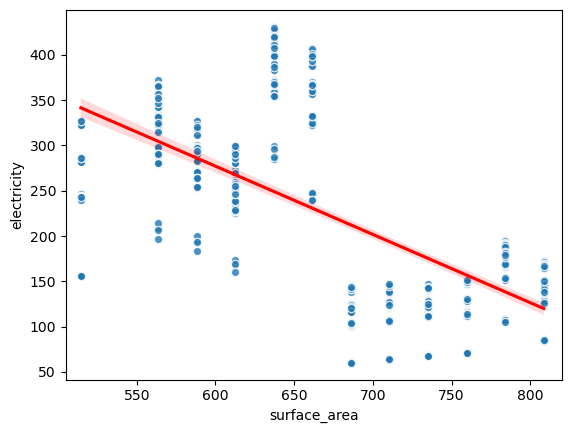

In [8]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

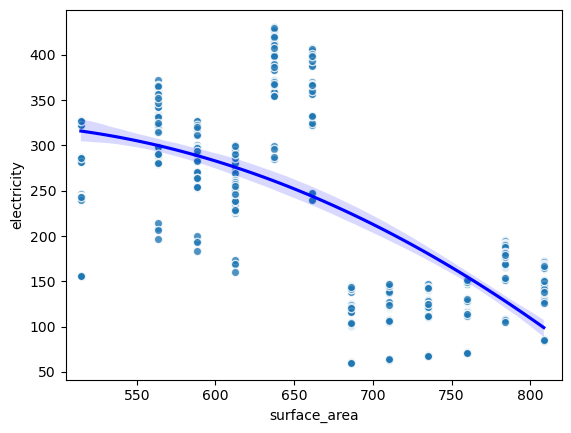

In [9]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2) # order 다항식 회귀식을 위한 항의 개수
plt.xlim(505, 820)
plt.show()

# 5차 모델 시각화

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'green'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

# 9차 모델 시각화

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color':'orange'},
            scatter_kws = {'edgecolor':'white'},
            order = 9)
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

# 4개 모델 비교 시각화

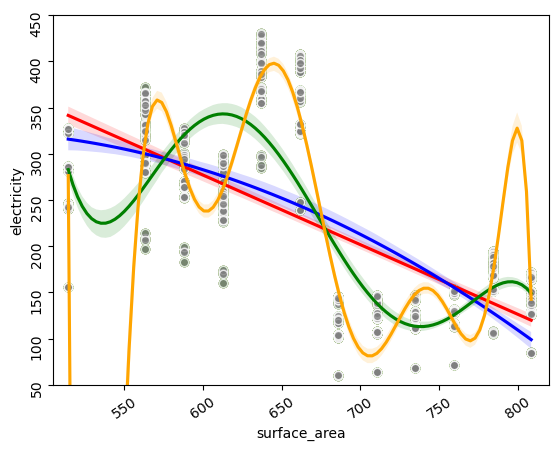

In [12]:
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'red'})
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', 
            data = Elec, 
            line_kws = {'color':'orange'}, order = 9,
            scatter_kws = {'color':'gray', 'edgecolor':'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# Training Error

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [15]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# 1차 모델 Training Error

In [17]:
X_train = Elec[['surface_area']]
y_train = Elec['electricity']

X_train.shape, y_train.shape

((768, 1), (768,))

In [18]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression() # 모델생성
Model_1.fit(X_train, y_train)

LinearRegression()

In [19]:
print(Model_1.coef_) # w
print(Model_1.intercept_) # b

[-0.75387157]
729.4538243006991


In [24]:
y_hat_1 = Model_1.predict(X_train) # 예측값 생성

len(y_hat_1)

768

In [25]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426344

# 5차 모델 Training Error

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [27]:
# X 다항차수 변환

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train)

In [29]:
PX_5[:3]

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13]])

In [30]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

In [31]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train)

LinearRegression()

In [32]:
# precision 부동소수점 출력의 정밀도 자릿수(기본값 8)
# suppress False인 경우 과학적 표기법 사용(True인 경우 항상 고정소수점으로 부동소수점숫자 출력)
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155143829669683        -0.10292961476147436
  0.0003787613678132           -0.000000503206298625505
  0.00000000022980588526734232]
2906.2258641209182


In [33]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred) # y_hat(예측값) 생성

y_hat_5.shape

(768,)

In [35]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2) # MSE(Mean Squared Error) 계산
TR_Err_5

4177.726330620809

# 9차 모델 Training Error

In [37]:
# X 다항차수 변환

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [39]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

In [40]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

In [41]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.0000000000000000000000000479174184660893
  0.00000000000000000036149462670149356
  0.00000000000000000002186332153417754
  0.00000000000000000960688875936692
  0.000000000000003177326406206501
  0.0000000000006336691114048881
 -0.0000000000000022880589641056528
  0.0000000000000000027751494738402227
 -0.0000000000000000000011271003953322504   ]
-440.08258376406695


In [42]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred) # y_hat(예측값) 생성

y_hat_9.shape

(768,)

In [43]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2) # MSE(Mean Squared Error) 계산
TR_Err_9

4086.7199908143884

# 3개 모델 Training Error 비교

In [44]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426344
5차 모델 :  4177.726330620809
9차 모델 :  4086.7199908143884


# Testing Error

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [47]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.shape

(768, 9)

# Train_Data vs. Test_Data

In [51]:
from sklearn.model_selection import train_test_split

TR_Elec, TE_Elec = train_test_split(Elec, 
                                    test_size = 0.2, 
                                    random_state = 2045)

In [52]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [53]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


# Array Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], 
                                                    Elec['electricity'], 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

In [56]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((614, 1), (614,), (154, 1), (154,))

In [57]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


In [58]:
y_train.head()

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

# Distribution Visualization

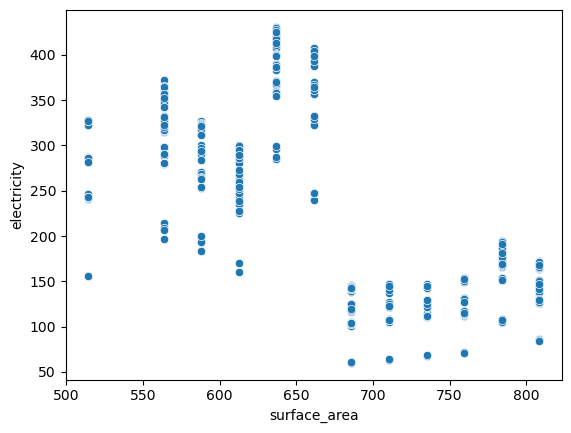

In [60]:
sns.scatterplot(x = TR_Elec['surface_area'], y = TR_Elec['electricity'])
plt.show()

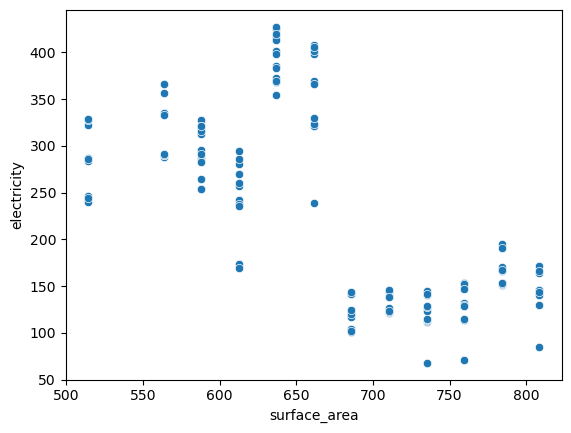

In [61]:
sns.scatterplot(x=TE_Elec['surface_area'], y = TE_Elec['electricity'])
plt.show() # Test Data

# 1차 모델 Testing Error

In [63]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

In [64]:
y_hat_1 = Model_1.predict(X_test) # y_hat(예측값) 생성

y_hat_1.shape

(154,)

In [65]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1) #  MSE(Mean Squared Error) 계산
TE_Err_1 

6044.17654762927

# Binary Classification - 분류

In [67]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [68]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


# 탐색적 데이터 분석

## 빈도분석

In [70]:
DF.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

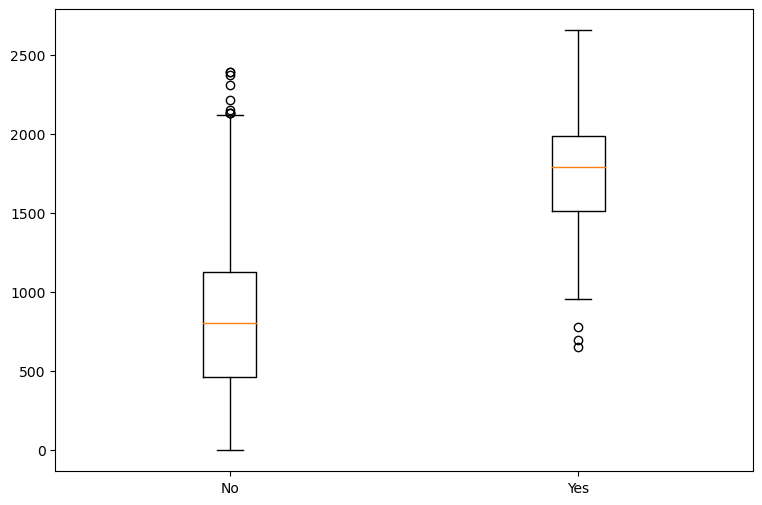

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.default == 'No'].balance,
             DF[DF.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()

# Data Preprocessing

In [73]:
X = DF[['balance']]
y = DF['default']

## Train & Test Split 
7: 3

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# Modeling

## Train_Data로 모델 생성

In [77]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

# Model 적용

In [79]:
y_hat = Model_lr.predict(X_test)

In [80]:
y_hat 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Model Validation

## Confusion Matrix 
'No'(상환) 기준

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix?

'Yes'(연체) 기준

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]], dtype=int64)

# Accuracy, Precision, Recall - 'No(상환)'

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


# Accuracy, Precision, Recall - 'Yes(연체)'

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


# 4) F1_Score - 'No(상환)'

In [89]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

# 5) F1_Score - 'Yes(연체)'

In [90]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

# Classification Report

In [91]:
# yes, no, accuracy 위주로 먼저 보기 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



# Cross Entropy Error

In [93]:
import warnings
warnings.filterwarnings('ignore')

# Cross Entropy 
- 서로 다른 사건의 확률을 곱하여 Entropy를 계산
- y : 실제값, y_hat : 예측값(can be incorrect)
- y를 Cross-Entropy의 가중치로 적용
- Binary Cross-Entropy Error = –y log(y_hat) – (1 - y) log(1 - y_hat)
- Categorical Cross-Entropy Error = –y * log(y_hat)

# y = 1 vs. y_hat = 1

In [94]:
import numpy as np

y = 1
y_hat = 1

-y * np.log(y_hat)

-0.0

# y = 1 vs. y_hat = 0.0001

In [96]:
y = 1
y_hat = 0.0001

-y * np.log(y_hat)

9.210340371976182

# y = 0 vs. y_hat = 0

In [98]:
y = 0
y_hat = 0

-(1 - y) * np.log(1 - y_hat)

-0.0

# Information Theory

발생 확률이 서로 다른 사건 A, B, C 
- Information Gain
- Information Gain(정보 이득량)
- 자주 발생하지 않는 사건은 자주 발생하는 사건보다 전달하는 정보량이 많음
- Information Gain(정보 이득량)은 정보의 희귀성(발생가능성)에 반비례
- I(x) = –log(P(x))

# AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise 
- Degree of Surprise(놀람의 정도)
- 예상하기 어려운 정보에 더 높은 가치를 매기는 것

In [100]:
Alphago = 0.999
Apes = 0.001
# 알파고가 이겼을 때 놀람의 정도보다, 침팬지가 이겼을 때 놀람의 정도가 더 크다.
print('%.3f' % -np.log(Alphago), '%.3f' % -np.log(Apes))

0.001 6.908


# Entropy 
- 불확실성의 정도
Entropy = E(–log(P(x)))
- 확률변수의 평균 정보량(기댓값)
sum(p(x) * log(p(x)))
- 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

# 승률이 비슷한 두팀의 Entropy

In [103]:
P1 = 0.5
P2 = 0.5

-P1 * np.log(P1) - P2 * np.log(P2)

0.6931471805599453

# 승률 차이가 큰 두팀의 Entropy

In [104]:
P1 = 0.999
P2 = 0.001

-P1 * np.log(P1) - P2 * np.log(P2)

0.007907255112232087